In [1]:
#Script to evaluate the determinants of patent citation 
#Renato Kogeyama

#Syracuse, December 3rd, 2019

#The original script is getting too complex
#There was many tentative scripts to play with data
#Here I am writing a script to show the relevance of variables to patent citation

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split

from scipy import stats
import datetime
import matplotlib.pyplot as plot
import pylab as pl

from math import sqrt


import sys
sys.path.append('/home/rkogeyam/scripts/')

from best_num_attr import best_num_attr
from xattrSelect import xattrSelect
from sampler import sampler
from normalize import normalize


In [3]:
%matplotlib inline

In [4]:
fname='/home/rkogeyam/PATENT_CITATION/df_w_pat_cit_191003.csv'

df=pd.read_csv(fname)

# sample_size=1000
# df=sampler(fname, sample_size)

/home/applications/anaconda3/4.2.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df=df.iloc[:,[1,2,5,8,9,11,12,13,14,15]]

In [6]:
df=df.set_index('id')

In [7]:
#these entries are wrong 
# df=df.drop(['type_Device provided with an optical communications function and optical communication system', 'type_Unsolicited message intercepting communications processor'], axis=1)

In [8]:
# df.dtypes
df=df.drop('date', axis=1)

In [9]:
df=df.dropna()

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_claims,6488250.0,14.143219,12.004228,0.0,6.0,12.0,20.0,887.0
forward_citation,6488250.0,2.184880,17.551109,0.0,0.0,0.0,0.0,2914.0
backward_citation,6488250.0,1.121036,7.449018,0.0,0.0,0.0,0.0,2592.0
year,6488250.0,2002.723440,11.322681,1976.0,1995.0,2005.0,2013.0,2017.0
month,6488250.0,6.590932,3.402092,1.0,4.0,7.0,10.0,12.0
day,6488250.0,15.642284,8.827000,1.0,8.0,16.0,23.0,31.0


In [11]:
# #normalization
df=normalize(df)

Total number of observations and attributes
(6488250, 8)
Number of numerical attributes: 6
Number of non-numerical attributes: 2


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_claims,6488250.0,1.594500e-02,0.013534,0.0,0.006764,0.013529,0.022548,1.0
forward_citation,6488250.0,7.497872e-04,0.006023,0.0,0.000000,0.000000,0.000000,1.0
backward_citation,6488250.0,4.324985e-04,0.002874,0.0,0.000000,0.000000,0.000000,1.0
year,6488250.0,6.517912e-01,0.276163,0.0,0.463415,0.707317,0.902439,1.0
month,6488250.0,5.082666e-01,0.309281,0.0,0.272727,0.545455,0.818182,1.0
day,6488250.0,4.880761e-01,0.294233,0.0,0.233333,0.500000,0.733333,1.0
type_TVPP,6488250.0,4.623743e-07,0.000680,0.0,0.000000,0.000000,0.000000,1.0
type_defensive publication,6488250.0,7.844950e-05,0.008857,0.0,0.000000,0.000000,0.000000,1.0
type_design,6488250.0,8.677270e-02,0.281502,0.0,0.000000,0.000000,0.000000,1.0
type_plant,6488250.0,3.820753e-03,0.061694,0.0,0.000000,0.000000,0.000000,1.0


In [13]:
# List of IVs
chosenColumns=df.columns.values.tolist()
len(chosenColumns)

27

In [14]:
chosenColumns.remove('backward_citation')
len(chosenColumns)

26

In [15]:
# chosenColumns.remove('citation_bi')
# chosenColumns.remove('log_back_cit')

In [16]:
myX = df.as_matrix(columns=chosenColumns)
myY = df.as_matrix(columns=['backward_citation'])

In [17]:
xTrain, xTest, yTrain, yTest = train_test_split(myX, myY, train_size=0.7, random_state=3) 
testSize = yTest.shape[0]
trainSize = yTrain.shape[0]

/home/applications/anaconda3/4.2.0/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Out of sample error versus attribute set size
0.0027|0.0027|0.0027|0.0027|0.0027|0.0027|0.0027|0.0027|0.0027|0.0027|0.0027|0.0027|0.0027|0.0027|0.0027|0.0027|0.0027|0.0027|0.0027|0.0027|0.0027|0.0116|0.3394|0.5056|109.0161|922.2907
['type_design', 'forward_citation', 'kind_S1', 'kind_B1', 'kind_E', 'num_claims', 'kind_E1', 'year', 'kind_A', 'type_statutory invention registration', 'day', 'kind_P', 'kind_P3', 'kind_H', 'kind_H1', 'type_TVPP', 'kind_I5', 'type_plant', 'type_reissue', 'kind_P2', 'kind_S', 'month', 'kind_I4', 'type_defensive publication', 'kind_B2', 'type_utility']


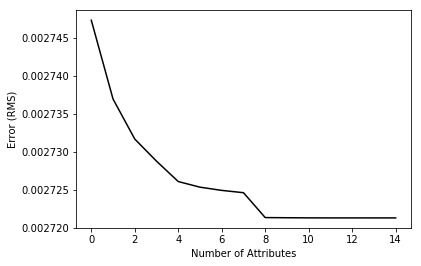

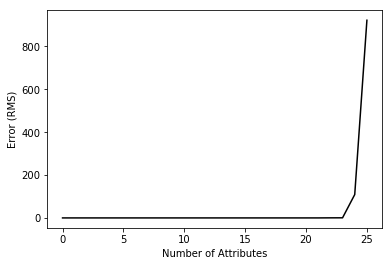

In [18]:
best_num_attr(myX, xTrain, xTest, yTrain, yTest, chosenColumns, regtype='linear')